In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy
%matplotlib inline 
%pdb
from __future__ import division

Automatic pdb calling has been turned ON


# 财务信息数据

In [119]:
fin_data = pd.read_csv("../financial.csv", header=0, encoding="utf-8")
fin_data = fin_data.fillna(0)
fin_data.convert_objects(convert_numeric=True)

/home/chen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,基金会名称,财务年度,净资产,总收入,捐赠收入,投资收益,服务收入,政府补助收入,其他收入,业务活动成本,...,费用合计,总支出,公益事业支出,工资福利支出,行政办公支出,其他支出,法人捐赠,自然人捐赠,境内捐赠,境外捐赠
0,北海天宁慈善基金会,2013,1.918713e+06,3.405616e+04,2.156000e+04,12496.16,0.00,0.00,0.00,2.500000e+05,...,2.225375e+05,3.874860e+05,2.582000e+05,30000.00,99286.00,0.00,2.000000e+04,1560.00,2.156000e+04,0.000000e+00
1,福建农林大学教育发展基金会,2013,1.686086e+07,1.090801e+07,1.069428e+07,0.00,0.00,0.00,213726.50,1.400784e+06,...,1.446926e+06,1.446926e+06,1.400784e+06,39700.00,6442.40,0.00,1.059428e+07,100000.00,1.045000e+07,2.442840e+05
2,福建省扶贫基金会,2013,1.049211e+07,6.425691e+06,5.375000e+06,446660.00,0.00,600000.00,4031.00,6.040397e+06,...,6.273203e+06,6.037706e+06,5.800000e+06,118485.12,77320.85,41900.00,0.000000e+00,5375000.00,5.375000e+06,0.000000e+00
3,广西妇女儿童发展基金会,2013,6.614637e+06,3.898046e+06,3.389580e+06,0.00,0.00,0.00,508465.64,2.591636e+06,...,2.772101e+06,2.772101e+06,2.591636e+06,59580.70,12814.07,108070.11,3.319580e+06,70000.00,3.389580e+06,0.000000e+00
4,广西国海扶贫助学基金会,2013,3.040783e+06,1.440190e+03,0.000000e+00,0.00,0.00,0.00,1440.19,3.039000e+05,...,7.771187e+04,3.039000e+05,3.039000e+05,0.00,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
5,宁夏回族自治区关心下一代基金会,2013,4.830445e+06,8.730573e+05,7.096660e+05,0.00,0.00,0.00,163391.31,7.322463e+05,...,7.841226e+05,7.841226e+05,7.322463e+05,42632.01,9244.23,0.00,6.284095e+05,81256.48,7.096660e+05,0.000000e+00
6,福建省龙岩扶贫基金会,2013,9.574226e+06,9.013735e+05,2.000000e+05,0.00,0.00,0.00,701373.49,8.800000e+05,...,9.509380e+05,9.509380e+05,8.800000e+05,41130.00,29808.00,0.00,2.000000e+05,0.00,2.000000e+05,0.000000e+00
7,福建省石竹慈善基金会,2013,3.702224e+06,4.741631e+06,4.724100e+06,0.00,0.00,0.00,17531.42,1.105300e+07,...,1.122363e+07,9.053000e+06,9.053000e+06,0.00,0.00,0.00,4.724100e+06,0.00,4.724100e+06,0.000000e+00
8,广西李宁基金会,2013,5.068391e+06,4.003042e+06,3.996708e+06,0.00,0.00,0.00,6334.11,2.422148e+06,...,3.275126e+06,3.275126e+06,2.422148e+06,337268.51,515709.38,0.00,3.996708e+06,0.00,8.999900e+04,3.906709e+06
9,广西吕贻标爱心基金会,2013,1.012347e+07,1.054200e+07,1.003000e+07,512000.00,0.00,0.00,0.00,2.571870e+05,...,2.813916e+05,4.185271e+05,2.285150e+05,68911.73,14389.00,106711.35,1.003000e+07,0.00,1.003000e+07,0.000000e+00


In [120]:
cols = fin_data.columns
print "columns number %d" %(len(cols))
print "-----------------"
cols_s = [c for c in cols]
print u','.join(cols_s)

columns number 23
-----------------
基金会名称,财务年度,净资产,总收入,捐赠收入,投资收益,服务收入,政府补助收入,其他收入,业务活动成本,管理费用,筹资费用,其他费用,费用合计,总支出,公益事业支出,工资福利支出,行政办公支出,其他支出,法人捐赠,自然人捐赠,境内捐赠,境外捐赠


In [124]:
def if_equal(d1, cols):
    print "----name----"
    print d1.name
    print "----total----"
    print "col: " + cols[2]
    print "----income----"
    print "col: " + cols[3]
    print "total income as: " + str(d1[cols[3]])
    print "commulative incomde as: " + str(sum(d1[cols[4:9]]))
    print "----cost----"
    print "col: " + cols[13]
    print "total cost as: " + str(d1[cols[13]])
    print "commulative cost as: " + str(sum(np.asarray(d1[cols[9:13]], dtype=float)))
    print "----use----"
    print "col: " + cols[14]
    print "total cost as: " + str(d1[cols[14]])
    print "commulative cost as: " + str(sum(np.asarray(d1[cols[15:19]], dtype=float)))
    print "---give----"
    print "col: " + cols[4]
    print "total give as: " + str(d1[cols[4]])
    print "commulative give as (faren/ziran): " + str(sum(np.asarray(d1[cols[19:21]], dtype=float)))
    print "commulative give as (jingwai/jingnei): " + str(sum(np.asarray(d1[cols[21:]], dtype=float)))

In [125]:
if_equal(fin_data.iloc[2], cols)

----name----
2
----total----
col: 净资产
----income----
col: 总收入
total income as: 6425691.0
commulative incomde as: 6425691.0
----cost----
col: 费用合计
total cost as: 6273202.78
commulative cost as: 6273202.78
----use----
col: 总支出
total cost as: 6037705.97
commulative cost as: 6037705.97
---give----
col: 捐赠收入
total give as: 5375000.0
commulative give as (faren/ziran): 5375000.0
commulative give as (jingwai/jingnei): 5375000.0


In [167]:
print "year: " + "".join(str(fin_data[cols[1]].unique().tolist()))

year: [2013, 2014, 2015]


Finantial info as year grows

In [168]:
fin_data_year = fin_data.pivot_table(index=[fin_data.index, cols[0]], values=[cols[2], cols[12], cols[13]], 
                     aggfunc=np.mean)
fin_data_year.to_csv("./data/基金会收入支出年份统计.csv", encoding="utf-8")

In [158]:
fin_data_year

总支出           总收入          费用合计
基金会名称             财务年度                                          
万科公益基金会           2013  1.783839e+07  1.345978e+07  1.783839e+07
                  2014  2.651864e+07  3.123883e+07  2.651864e+07
                  2015  2.520429e+07  1.014548e+08  2.520429e+07
上海乐三兰馨教育发展基金会     2014  0.000000e+00  2.000000e+06  0.000000e+00
                  2015  1.998821e+06  0.000000e+00  1.998821e+06
上海交响乐团文化发展基金会     2013  4.172377e+06  1.671580e+07  4.172377e+06
                  2014  5.234456e+06  9.363816e+06  5.234456e+06
                  2015  5.681505e+06  2.016154e+07  5.681505e+06
上海交通大学教育发展基金会     2013  7.763739e+07  1.938379e+08  7.763739e+07
                  2014  8.049826e+07  2.104808e+08  8.049826e+07
                  2015  2.597320e+08  4.352032e+08  2.597320e+08
上海仁德基金会           2013  2.362309e+06  4.259911e+06  2.362309e+06
                  2014  3.390249e+06  2.587948e+06  3.390249e+06
                  2015  2.681707e+06  4.450449e+06  2.681707e+06
上海医学创新发展基金会       2013  3.567518e+06  3.564706e+06  3.567518e+06
                  2014  2.590257e+07  2.890202e+07  2.590257e+07
                  2015  1.084233e+07  1.075804e+07  1.151876e+07
上海华信公益基金会         2013  1.749858e+07  3.887309e+07  1.749858e+07
                  2014  2.047423e+07  2.064233e+07  2.047423e+07
                  2015  1.211211e+07  1.414562e+07  1.211211e+07
上海叔同深渊科学技术发展基金会   2014  0.000000e+00  2.000000e+06  0.000000e+00
                  2015  9.439476e+05  1.684859e+06  9.701633e+05
上海唐君远教育基金会        2013  2.050187e+07  1.270044e+07  2.050187e+07
                  2014  1.487344e+07  3.033001e+07  1.487344e+07
                  2015  2.446593e+07  3.138949e+07  2.446593e+07
上海夏征农民族文化教育发展基金会  2013  2.291015e+06  2.657283e+06  2.291015e+06
                  2014  1.041849e+07  9.757939e+06  1.041849e+07
                  2015  3.819222e+06  3.676413e+06  3.819222e+06
上海大学教育发展基金会       2014  5.200000e+05  4.933124e+06  5.200305e+05
                  2015  5.564549e+05  4.641189e+06  5.564549e+05
...                              ...           ...           ...
顺丰公益基金会           2015  2.188307e+07  3.026378e+07  2.188307e+07
首都师范大学教育基金会       2013  7.206740e+05  4.719786e+06  7.206740e+05
                  2014  3.647977e+06  1.481086e+07  3.647977e+06
                  2015  3.469256e+06  8.366341e+06  3.469256e+06
香江社会救助基金会         2013  7.461401e+06  2.462823e+07  7.562326e+06
                  2014  1.075303e+07  5.168523e+07  1.075303e+07
                  2015  1.285586e+07  4.881648e+07  1.285586e+07
鲁迅文化基金会           2013  5.900364e+06  1.273788e+07  5.900364e+06
                  2014  8.538792e+06  9.339020e+06  8.538792e+06
                  2015  7.701751e+06  8.670259e+06  7.701751e+06
黄奕聪慈善基金会          2013  4.973097e+06  4.186267e+06  4.973097e+06
                  2014  4.524334e+06  4.620939e+06  4.524334e+06
                  2015  4.337775e+06  4.567570e+06  4.337775e+06
黑龙江大学教育发展基金会      2013  3.847157e+06  8.079148e+05  3.847723e+06
                  2014  6.813465e+05  1.092874e+06  6.813465e+05
                  2015  4.429368e+05  1.967359e+06  4.429368e+05
黑龙江省东北林业大学教育发展基金会 2013  1.934323e+06  2.124644e+06  5.579712e+06
                  2014  1.429740e+06  1.625667e+06  1.429740e+06
                  2015  3.207573e+06  3.106139e+06  3.207573e+06
黑龙江省体育发展基金会       2013  2.487250e+05  1.600665e+06  2.446480e+05
黑龙江省华侨经济文化基金会     2013  7.383589e+04  2.015353e+05  7.383589e+04
                  2014  1.581827e+06  3.078673e+06  1.581827e+06
                  2015  1.471585e+06  2.049701e+06  1.471585e+06
黑龙江省哈尔滨妇女儿童基金会    2015  1.285719e+06  2.682186e+06  1.285719e+06
黑龙江省妇女儿童基金会       2013  6.230176e+06  5.658897e+06  6.234211e+06
                  2014  2.790092e+06  3.159666e+06  2.790092e+06
                  2015  3.159798e+06  3.529697e+06  3.159798e+06
黑龙江省青年创业就业基金会     2013  2.671798e+06  4.561088e+06  2.671798e+06
                  2014  1.265885e+06  1.420734e+06  1.265885e+06
   

## 变量选择
### 输入： 财务信息数据 （所有列）
### 输出： PCA最佳主元素个数，距离矩阵

1. PCA/FA/NMF/SelectKBest/SparsePCA/ICA choose the best number of features, get the similarity matrix, cluser thoese members.
2. Clustering those members ===> easy find similar memembers, based on few number of features.
3. Based on labels, we have to discretize the 3 main columns ====> train classfication model.

In [117]:
from sklearn.decomposition import PCA, FactorAnalysis, MiniBatchSparsePCA, KernelPCA, SparsePCA, NMF, FastICA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, Normalizer

In [208]:
# 在pca的时候不需要总的收入，支出，捐赠数据`
# X = fin_data.drop([cols[3], cols[4], cols[13], cols[14]], axis=1)
X = fin_data
# X = fin_data[[cols[0], cols[1], cols[2], cols[3], cols[14], cols[13]]]

# 对年份数据授予权重
C = X.columns

In [4]:
y1 = 2013
y2 = 2015
w1 = 0.2
w2 = 0.5

is_y1 = X[C[1]] == y1
is_y2 = X[C[1]] == y2

X.ix[is_y1, C[2:]] = X.ix[is_y1, C[2:]] * w1
X.ix[is_y2, C[2:]] = X.ix[is_y2, C[2:]] * w2
X.ix[(~is_y1) & (~is_y2), C[2:]] = X.ix[(~is_y1) & (~is_y2), C[2:]] * (1-w1-w2)

In [210]:
# 年份的权重和features的数量
n_features = len(X.columns)
n_components = np.arange(4, len(X_no_weight_in_year.columns), 1)
n_weights = np.arange(0, 0.3, 0.1)

### 结论1: 对年份进行权重，差别其实不大?
### 结论2: 一定要对相同的基金进行合并!

In [484]:
# 按照年份权重之后的结果
X_weighted_year = X.drop(C[1], axis=1)
X_weighted_year = X_weighted.pivot_table(index=X_weighted_year .columns[0], 

In [209]:
# 没有权重取平均
X_no_weight_in_year = X.drop([C[1]], axis=1)
X_no_weight_in_year = X_no_weight_in_year.pivot_table(index=X_no_weight_in_year.columns[0],
                                                     aggfunc=np.sum)

In [201]:
# 只包含总收入，总支出，净资产，总费用的数据
X_with_f = X.drop([C[1]], axis=1)
X_with_f = X_with_f.pivot_table(index=X_with_f.columns[0], aggfunc=np.sum)

In [9]:
def train_method(X, clf, params, name):
    res = {}
    pipe = Pipeline([('standarize', Normalizer()), ('reduce_dim', clf), ('cluster', KMeans())])
    pars = {}
    if len(params) > 0:
        for key, value in params.iteritems():
            pars['reduce_dim__'+key] = value
    pars['cluster__.n_clusters': np.range(5, 11, 1)]
    cv = GridSearchCV(pipe, param_grid=[pars], cv=3)
    model = cv.fit(X)
    res['best_cross_val'] = np.mean(cross_val_score(model.best_estimator_, X))
    res['method_name'] = name
    res['best_n_components'] = model.best_params_[ 'reduce_dim__' + 'n_components']
    clf_score = []
    for n in params['n_components']:
        clf.n_components = n
        clf_score.append(np.mean(cross_val_score(clf, X)))
    res['method_score'] = clf_score
    res['choose_components'] = params['n_components']
    res['best_params'] = model.best_params_
    clf.n_components = res['best_n_components']
    clf.fit(X)
    if hasattr(clf, 'explained_variance_ratio_'):
        plt.semilogy(clf.explained_variance_ratio_.cumsum(), '--o')
    res['cv'] = cv
    return res

In [10]:
def train_method_other(X, clf, params, name):
    res = {}
    pipe = Pipeline([('standarize', Normalizer()), ('reduce_dim', clf), ('cluster', MiniBatchKMeans())])
    pars = {}
    for key, value in params.iteritems():
        pars['reduce_dim__'+key] = value
    cv = GridSearchCV(pipe, param_grid=[pars], cv=3)
    model = cv.fit(X)
    res['method_name'] = name
    res['best_n_components'] = model.best_params_[ 'reduce_dim__' + 'n_components']
    res['choose_components'] = params['n_components']
    res['best_params'] = model.best_params_
    clf.n_components = res['best_n_components']
    clf.fit(X)
    if hasattr(clf, 'explained_variance_ratio_'):
        plt.semilogy(clf.explained_variance_ratio_.cumsum(), '--o')
    res['cv'] = cv
    return res;

In [11]:
def show_method(res):
    print "method name: " + res['method_name']
    print "best cross validation value: " + str(res['best_cross_val'])
    for key, value in res['best_params'].iteritems():
        print "best params *** " + key + " *** value is: " + str(value) 
    plt.figure(figsize=(6.5,5))
    plt.plot(res['choose_components'], res['method_score'], 'b', label=res['method_name'])
    plt.axvline(res['best_n_components'], color='r', linestyle='--')

In [12]:
def show_method_other(res):
    print "method name: " + res['method_name']
    for key, value in res['best_params'].iteritems():
        print "best params *** " + key + " *** value is: " + str(value) 
    cv = res['cv']
    print "**** best score is ****" + str(cv.best_score_)

**** There is weight w1 = 0.2, w2 = 0.3, w3 = 0.5 ****
method name: PCA cv
best cross validation value: -3.99020462262
best params *** reduce_dim__svd_solver *** value is: auto
best params *** reduce_dim__whiten *** value is: False
best params *** reduce_dim__n_components *** value is: 2


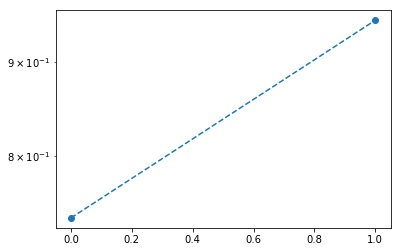

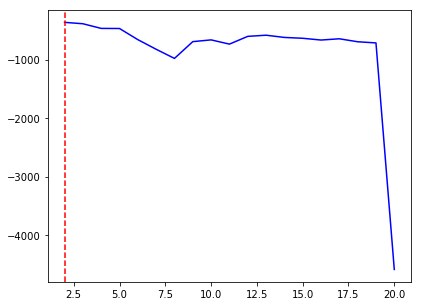

In [487]:
# pca method
print "**** There is weight w1 = 0.2, w2 = 0.3, w3 = 0.5 ****"
pca_params = {'n_components': n_components, 'whiten': [True, False], 'svd_solver': ['full', 'auto']}
pca_res = train_method(X_weighted_year, PCA(), pca_params, 'PCA cv')
show_method(pca_res)

**** There is no weight ****
method name: PCA cv
best cross validation value: -4.08786322403
best params *** reduce_dim__svd_solver *** value is: full
best params *** reduce_dim__whiten *** value is: False
best params *** reduce_dim__n_components *** value is: 2


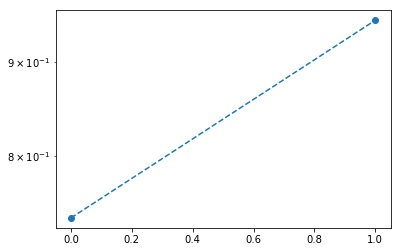

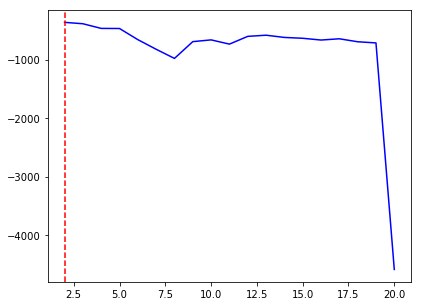

In [488]:
# pca method
print "**** There is no weight ****"
pca_params = {'n_components': n_components, 'whiten': [True, False], 'svd_solver': ['full', 'auto']}
pca_res = train_method(X_no_weight_in_year, PCA(), pca_params, 'PCA cv')
show_method(pca_res)

In [495]:
# MiniBatchSparsePCA  method
print "**** There is weight w1 = 0.2, w2 = 0.3, w3 = 0.5 ****"
spca_params = {'n_components': n_components}
spca_res = train_method_other(X_weighted_year, MiniBatchSparsePCA(), spca_params, 'MiniBatchSparsePCA')
show_method_other(spca_res)

**** There is weight w1 = 0.2, w2 = 0.3, w3 = 0.5 ****
method name: MiniBatchSparsePCA
best params *** reduce_dim__n_components *** value is: 2
**** best score is ****-0.18400822262


### 结论3： 最佳主元素生成算法： MiniBatchPCA
### 结论4： 最佳主元素个数： 5

In [13]:
print "**** no weighted train sparsePCA ****"
spca_params = {'alpha': np.arange(0.5, 1.5, 0.5), 'ridge_alpha': np.arange(0, 0.2, 0.05), 
               'n_components': n_components, 'batch_size': np.arange(1,5,1)}
spca_res = train_method_other(X_no_weight_in_year, MiniBatchSparsePCA(), spca_params, 'MiniBatchSparsePCA')
show_method_other(spca_res)

**** no weighted train sparsePCA ****


/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.690e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.616e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.788e-08
  ConvergenceWarning)
/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.365e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.788e-08
  ConvergenceWarning)
/home/chen/anaconda2/lib/

method name: MiniBatchSparsePCA
best params *** reduce_dim__ridge_alpha *** value is: 0.05
best params *** reduce_dim__alpha *** value is: 1.0
best params *** reduce_dim__batch_size *** value is: 1
best params *** reduce_dim__n_components *** value is: 5
**** best score is ****-0.0989759274297


### 结论5： 得到距离矩阵: correlation (1 - pearson correlation)

In [14]:
cv = spca_res['cv']

In [20]:
# get normalizer and pca 
normalizer = cv.best_estimator_.steps[0][1]
pca = cv.best_estimator_.steps[1][1]
X_new = normalizer.transform(X_no_weight_in_year)
X_new = pca.transform(X_new)

In [1]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

In [24]:
X_new_dist = pdist(X_new, metric='correlation')

In [28]:
X_new_dist = cdist(X_new, X_new, metric='correlation')

In [39]:
X_new_dist[0, 1]

0.28031511128774866

In [66]:
x = [i for i in range(len(X_no_weight_in_year.index.tolist()))]
y = X_no_weight_in_year.index.tolist()
data = {'name': y, 'index': x}
df = pd.DataFrame(data['index'], index=data['name'], columns=['label'])
df.to_csv("./data/基金和序号对应.csv", encoding="utf-8")

In [71]:
# store the distance matrix for finantial data
pkl_file = open("./model/distance_fin.dmp", "w")
pkl.dump(X_new_dist, pkl_file)
pkl_file.close()

In [74]:
X_new_dist

array([[  0.00000000e+00,   2.80315111e-01,   4.74999329e-02, ...,
          1.74479365e-02,   8.35806537e-02,   9.70646510e-03],
       [  2.80315111e-01,   3.33066907e-16,   3.92074793e-01, ...,
          2.74451910e-01,   1.60533060e-01,   2.87871641e-01],
       [  4.74999329e-02,   3.92074793e-01,   2.22044605e-16, ...,
          1.13721900e-01,   2.39890136e-01,   8.09147503e-02],
       ..., 
       [  1.74479365e-02,   2.74451910e-01,   1.13721900e-01, ...,
         -2.22044605e-16,   5.00761102e-02,   2.19269532e-02],
       [  8.35806537e-02,   1.60533060e-01,   2.39890136e-01, ...,
          5.00761102e-02,   2.22044605e-16,   5.92562081e-02],
       [  9.70646510e-03,   2.87871641e-01,   8.09147503e-02, ...,
          2.19269532e-02,   5.92562081e-02,   0.00000000e+00]])

# 聚类打标签
### 输入： 财务数据（只包含了净资产，总收入，总支出，总费用列）（效果不好）
### 新输入： 财务数据所有列
### 输出： 标签，通过R离散数据列之后得到分类器 

In [202]:
X_with_f.head(n=4)

,净资产,总支出,总收入,费用合计
基金会名称,,,,
万科公益基金会,4.096164e+08,6.956131e+07,1.461534e+08,6.956131e+07
上海乐三兰馨教育发展基金会,2.001179e+06,1.998821e+06,2.000000e+06,1.998821e+06
上海交响乐团文化发展基金会,2.133880e+08,1.508834e+07,4.624116e+07,1.508834e+07
上海交通大学教育发展基金会,2.473123e+09,4.178677e+08,8.395218e+08,4.178677e+08


In [203]:
c = X_with_f.columns

In [184]:
# get the new columns
X_with_f[c[1]] = X_with_f[c[1]] / X_with_f[c[0]]
X_with_f[c[2]] = X_with_f[c[2]] / X_with_f[c[0]]
X_with_f[c[3]] = X_with_f[c[3]] / X_with_f[c[0]]

In [156]:
X_with_f.head(n=4)

,净资产,总支出,总收入,费用合计
基金会名称,,,,
万科公益基金会,4.096164e+08,0.169821,0.356805,0.169821
上海乐三兰馨教育发展基金会,2.001179e+06,0.998821,0.999411,0.998821
上海交响乐团文化发展基金会,2.133880e+08,0.070708,0.216700,0.070708
上海交通大学教育发展基金会,2.473123e+09,0.168964,0.339458,0.168964


In [213]:
def train_cluster_method(X, clf, param, name):
    res = {}
    pipe = Pipeline([('standarize', Normalizer()), ('reduce_dim', clf), ('cluster', KMeans())])
    pars = {}
    for k, v in param.iteritems():
        pars['cluster__' + k] = v
    cv = GridSearchCV(pipe, param_grid=[pars], cv=3)
    model = cv.fit(X)
    res['method_name'] = name
    res['best_cross_val'] = np.mean(cross_val_score(model.best_estimator_, X))
    res['method_name'] = name
    res['best_params'] = model.best_params_
    res['best_number'] = model.best_params_['cluster__n_clusters']
    res['cv'] = cv
    return res;

In [214]:
def show_cluster_method(res):
    param = res['best_params']
    for k, v in param.iteritems():
        print 'best param for {0} is: {1}'.format(k, v)
    print "best cross validation score is: " + str(res['best_cross_val'])

In [217]:
best_res = {}
best_score = -np.infty
number = []
for i in range(30):
    print "**** Kmeans ****"
    kmeans_param = {'n_clusters': np.arange(3, 12, 1)}
    kmeans_res = train_cluster_method(X_with_f, MiniBatchSparsePCA(ridge_alpha=0.05, alpha=1.0, n_components=5, batch_size=1), kmeans_param, 'Kmeans')
    show_cluster_method(kmeans_res)
    number.append(kmeans_res['best_number'])
    if (kmeans_res['best_cross_val'] > best_score):
        best_score = kmeans_res['best_cross_val']
        best_res = kmeans_res

**** Kmeans ****
best param for cluster__n_clusters is: 6
best cross validation score is: -0.384398177303
**** Kmeans ****
best param for cluster__n_clusters is: 8
best cross validation score is: -0.326505363583
**** Kmeans ****
best param for cluster__n_clusters is: 5
best cross validation score is: -0.391349925731
**** Kmeans ****
best param for cluster__n_clusters is: 11
best cross validation score is: -0.31251147087
**** Kmeans ****
best param for cluster__n_clusters is: 11
best cross validation score is: -0.251957091064
**** Kmeans ****
best param for cluster__n_clusters is: 11
best cross validation score is: -0.294536046291
**** Kmeans ****
best param for cluster__n_clusters is: 10
best cross validation score is: -0.241596688978
**** Kmeans ****
best param for cluster__n_clusters is: 10
best cross validation score is: -0.281260838321
**** Kmeans ****
best param for cluster__n_clusters is: 11
best cross validation score is: -0.324587917246
**** Kmeans ****
best param for cluster__

### 结论1： 效果不好！（还是要用所有变量取主元素之后得到的标签）

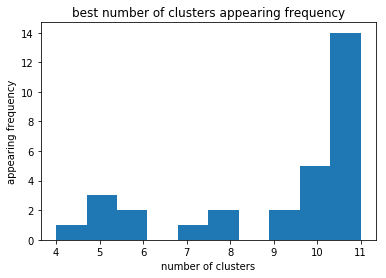

In [218]:
plt.hist(number)
plt.title("best number of clusters appearing frequency")
plt.xlabel("number of clusters")
plt.ylabel("appearing frequency")

### 结论1： 最佳聚类个数： 10

In [219]:
show_cluster_method(best_res)

best param for cluster__n_clusters is: 10
best cross validation score is: -0.216872004153


method name: FA
best cross validation value: -57.0733359686
best params *** reduce_dim__svd_method *** value is: randomized
best params *** reduce_dim__n_components *** value is: 2


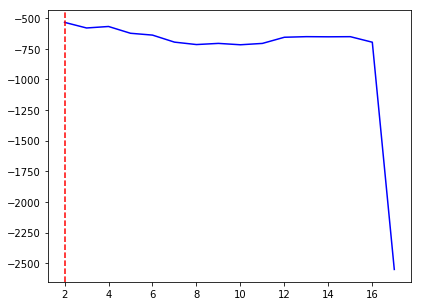

In [422]:
# fa method
fa_params = {'n_components': n_components, 'svd_method': ['randomized', 'lapack']}
fa_res = train_method(X_weighted_year, FactorAnalysis(), fa_params, "FA")
show_method(fa_res)

In [499]:
# fast ica
ica_params = {'n_components': n_components, 'whiten': [True, False]}
ica_res = train_method_other(X_no_weight_in_year, FastICA(), ica_params, 'ICA')
show_method_other(ica_res)

method name: ICA
best params *** reduce_dim__whiten *** value is: True
best params *** reduce_dim__n_components *** value is: 2
**** best score is ****-0.15163475798


In [503]:
# sparce pca
no_batch_spca_params = {'alpha': np.arange(0.5, 1.5, 0.5), 'ridge_alpha': np.arange(0, 0.2, 0.05), 
                        'n_components': n_components}
no_batch_spca_res = train_method_other(X_weighted_year, SparsePCA(), no_batch_spca_params, 'SparsePCA')
show_method_other(no_batch_spca_res)

method name: SparsePCA
best params *** reduce_dim__ridge_alpha *** value is: 0.05
best params *** reduce_dim__alpha *** value is: 0.5
best params *** reduce_dim__n_components *** value is: 2
**** best score is ****-0.18392046876


### 结论1： 得到距离矩阵

In [220]:
cv = best_res['cv']

In [221]:
model = cv.best_estimator_

In [222]:
X_with_f_label = model.predict(X_with_f)

In [223]:
X_with_f.ix[:, 'label'] = X_with_f_label
X_with_f.to_csv("./data/基金会财务信息年分权重后结果统计（分类后）.csv", encoding="utf-8")

(array([  87.,   65.,   89.,   19.,   58.,   61.,  113.,   46.,   52.,   14.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

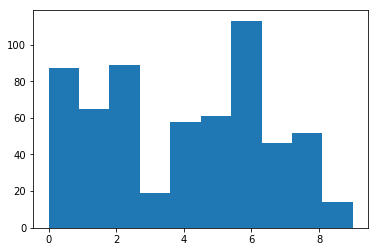

In [224]:
plt.hist(X_with_f_label)

### 结论1： 用R做discretization的工作#
### 结论2： 用等频数的方法进行离散
### 结论3： 最佳分类算法：svm 虽然都挺烂的

In [230]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [231]:
X_fin_reduced = pd.read_csv("./data/基金会财务信息年分权重后提取关键列（分类后）.csv", encoding="utf-8", index_col=1)

In [232]:
X_fin_reduced = X_fin_reduced.drop(X_fin_reduced.columns[0], axis=1)

In [233]:
cols = X_fin_reduced.columns
X = X_fin_reduced[cols[:-1]]
Y = X_fin_reduced[cols[-1]]

In [238]:
# naive bayes
bayes_param = {}
bayes = GaussianNB()
bayes_res = train_classify_method(X, Y, bayes, bayes_param, 'Naive Bayes')
show_classify_method(bayes_res)

the method name is: Naive Bayes
***** the best score: 0.491721854305


In [239]:
# svm classifier 
svm_param = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.01, 1, 0.025)}
svm = SVC()
svm_res = train_classify_method(X, Y, svm, svm_param, 'SVM')
show_classify_method(svm_res)

the method name is: SVM
***** the best param: kernel is: rbf *****
***** the best param: C is: 0.46 *****
***** the best score: 0.579470198675


In [240]:
# ada boost classifier 
ada_boost_param = {'n_estimators': np.arange(20, 100, 30)}
ada_boost = AdaBoostClassifier()
ada_boost_res = train_classify_method(X, Y, ada_boost, ada_boost_param, 'Ada boost')
show_classify_method(ada_boost_res)

the method name is: Ada boost
***** the best param: n_estimators is: 20 *****
***** the best score: 0.352649006623


In [241]:
# multiple neural networks 
mlp_param = {'activation': ['relu', 'identity', 'logistic', 'tanh'], 'alpha': np.arange(0.0001, 0.001, 0.0005)}
mlp = MLPClassifier()
mlp_res = train_classify_method(X, Y, mlp, mlp_param, 'multi layer neural networks')
show_classify_method(mlp_res)

/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


the method name is: multi layer neural networks
***** the best param: alpha is: 0.0006 *****
***** the best param: activation is: relu *****
***** the best score: 0.57119205298


In [242]:
# random forest classifier
random_forest_param = {'criterion': ['gini', 'entropy'], 'n_estimators': np.arange(5, 30, 5)}
# random_forest_param = {}
random_forest = RandomForestClassifier(n_jobs=-1)
random_forest_res = train_classify_method(X, Y, random_forest, random_forest_param, 'random forest')
show_classify_method(random_forest_res)

the method name is: random forest
***** the best param: n_estimators is: 10 *****
***** the best param: criterion is: gini *****
***** the best score: 0.561258278146


In [243]:
cv = svm_res['cv']
clf = cv.best_estimator_

In [244]:
clf

SVC(C=0.46000000000000002, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [245]:
pkl_file = open("./model/svm_fin.pkl", "w")
pkl.dump(clf, pkl_file)
pkl_file.close()

# 业务领域数据

# Index Data

In [43]:
basic_info = pd.read_csv("../basic_info.csv", header=0, index_col=0, encoding='utf-8')

In [35]:
f_name = basic_info.index
f_index = np.arange(0, len(basic_info), 1)
f_name_index = pd.DataFrame(data={"name": f_name, "index": f_index},columns=["name"])
f_name_index.to_csv("./data/基金和序号对应.csv", encoding="utf-8")

## 聚类打标签
### 输入： 把基金领域转换成0/1的矩阵
### 输出： 聚类标签和距离矩阵

1. Kmeans/MinibatchKmeans/SpectralClustering ====> get best number of clusters and labels for data
2. NaiveBayes/SVM/  ====> get best classification model

In [6]:
cols = basic_info.columns
print "columns number %d" %(len(cols))
print "-----------------"
cols_s = [c for c in cols]
print u','.join(cols_s)

columns number 29
-----------------
宗旨,业务范围,成立时间,业务主管单位,票据类型,原始基金,登记部门,注册地,所在地,办公地址,经度,纬度,理事长姓名,秘书长姓名,对外联系人姓名,对外联系人邮箱,网站地址,基金会微博,基金会信息披露栏目,基金会行业领域,全职员工,志愿者数量,专项基金数量,负责人数,负责人中现任国家工作人员数,负责人中担任过省部级及以上领导职务的人数,政府年检,评估等级,优惠资格类型


In [157]:
# 得到业务领域数据
yewu_data = basic_info[cols[19]]
yewu_data = pd.DataFrame(yewu_data)
yewu_data.columns = ["f"]
yewu_data_rows = len(yewu_data)

In [86]:
# 得到名称和序号的对应
yewu_index = pd.read_csv("./data/项目领域和序号对应.csv", header=None, index_col=1, encoding="utf-8")
name_list = yewu_index.index.tolist()

In [158]:
# 1-25
# m = dict.fromkeys(yewu_index[0], [])
m = dict.fromkeys(name_list)
for key in m.iterkeys():
    m[key] = [0 for i in range(yewu_data_rows)]

In [159]:
# special signal
COMMA = u"，"

In [132]:
#  build
def build_yewu_map(x, df, m):
    l = x.split(COMMA)
    for v in l:
        for key in m.iterkeys():
            if key == v:
                m[key].append(1)
            else:
                m[key].append(0)

In [58]:
# find more fields to add 
def build_yewu_index(x, l):
    x_list = x.split(COMMA)
    for v in x_list:
        try:
            l.index(v)
        except ValueError:
            l.append(v)

In [160]:
# 得到基金和领域的对应，sparse matrix有0,1
yewu_data = pd.DataFrame(yewu_data.f.map(lambda x: x.split(COMMA)))
yewu_df = pd.DataFrame(data=m)

In [162]:
# get the map
for key in range(yewu_data_rows):
    temp = yewu_data.iloc[key]["f"]
    for v in temp:
        m[v][key] = 1

In [192]:
yewu_df = yewu_df.set_index(['jijin'], drop=True)
yewu_df.to_csv("./data/基金和领域匹配.csv",encoding="utf-8")

In [15]:
yewu_df = pd.read_csv("./data/基金和领域匹配.csv", index_col=0, encoding="utf-8")

In [87]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, SpectralClustering
from sklearn.cluster import estimate_bandwidth, MeanShift, spectral_clustering

In [183]:
k_means = KMeans(n_clusters=10, init='k-means++', n_jobs=-1)
k_means.fit(yewu_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# number of clusters
n_clusters = np.arange(5, 15, 1)

In [9]:
def train_cluster_method(X, clf, params, name):
    cv = GridSearchCV(clf, param_grid=[params], n_jobs=-1)
    cv.fit(X)
    res = {}
    res['cv'] = cv
    res['best_params'] = cv.best_params_
    res['best_score'] = cv.best_score_
    res['method_name'] = name
    cv_score = []
    if params.has_key('n_clusters'):
        res['n_clusters'] = params['n_clusters']
        res['best_n_clusters'] = cv.best_params_['n_clusters']
        for v in params['n_clusters']:
            clf.n_clusters = v
            cv_score.append(np.mean(cross_val_score(clf, X)))
        res['method_score'] = cv_score
    return res

In [10]:
def show_cluster_method(res):
    print "*** the method is: " + res['method_name'] + " ***"
    for k, v in res['best_params'].iteritems():
        print "*** the best param of " + k + " is: " + str(v) + " ***"
    print "*** the best score is: " + str(res['best_score']) + " ***"
    if res.has_key('method_score'):
        n_clusters = res['n_clusters']
        plt.figure(figsize=(6.5,5))
        plt.plot(n_clusters, res['method_score'], 'b')
        plt.axvline(res['best_n_clusters'], color='r', linestyle='--')
        elbow = get_elbow(res['method_score'])
        clusters = res['n_clusters']
        for e in elbow:
            print "elbow points: " + str(clusters[e])
            plt.axvline(clusters[e], color='r', linestyle='--')

In [18]:
def get_elbow(l):
    res = []
    for k, v in enumerate(l):
        if k > 0 and l[k-1] > l[k]:
            res.append(k)
    return res        

/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/chen/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


*** the method is: Kmeans ***
*** the best param of n_clusters is: 14 ***
*** the best param of algorithm is: full ***
*** the best score is: -198.552669667 ***
elbow points: 10


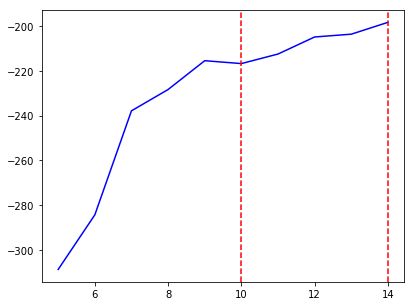

In [37]:
# kmeans
kmeans_param = {'n_clusters': n_clusters, 'algorithm': ['full', 'auto']}
kmeans = KMeans(init='k-means++', n_jobs=-1)
kmeans_res = train_cluster_method(yewu_df, kmeans, kmeans_param, 'Kmeans')
show_cluster_method(kmeans_res)

*** the method is: Kmeans batch ***
*** the best param of n_clusters is: 14 ***
*** the best param of batch_size is: 50 ***
*** the best score is: -201.277556459 ***
elbow points: 7
elbow points: 9


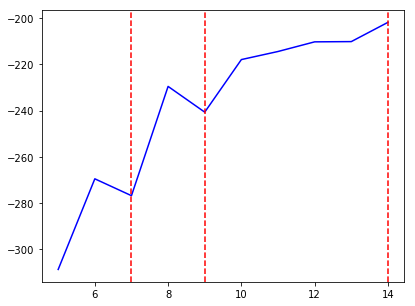

In [38]:
# minibatch kmeans
kmeans_batch_param =  {'n_clusters': n_clusters, 'batch_size': np.arange(50, 200, 50)}
kmeans_batch = MiniBatchKMeans()
kmeans_batch_res = train_cluster_method(yewu_df, kmeans_batch, kmeans_batch_param, 'Kmeans batch')
show_cluster_method(kmeans_batch_res)

In [277]:
# use mean shift
e_bandwidth = estimate_bandwidth(yewu_df.values)
meanshift = MeanShift(bandwidth=e_bandwidth)
meanshift.fit(yewu_df)
labels = meanshift.labels_
print "number of clusters: " + str(len(np.unique(labels)))

number of clusters: 15


In [294]:
# spectrul cluster
spec_param = {'n_clusters': n_clusters, 'n_neigbors': np.arange(5, 20, 5), 'assign_labels': ['kmeans', 'discretize'], 
                          'gamma': np.logspace(0.5,  2, num=10)}
spec = SpectralClustering(affinity = "nearest_neighbors")
spec_res = train_cluster_method(yewu_df, spec, spec_param, 'spectral')

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=8, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None) does not.

In [297]:
spec = SpectralClustering(affinity="nearest_neighbors", n_clusters=10)
spec.fit(yewu_df)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=10, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

### 结论1： 找到最佳聚类数量： 8
### 结论2： 找到最佳聚类算法： Kmeans

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
# choose_clusters = np.arange(5, 13, 1)
choose_clusters = [8]

In [395]:
def classifier(cv, number, name, X):
    estimator = cv.best_estimator_
    estimator.n_clusters = number
    estimator.fit(X)
    y_true = estimator.predict(X)
    cv_score = np.mean(cross_val_score(GaussianNB(), X, y_true, scoring='accuracy'))
    print "method: " + name + " with the accuracy: " + str(cv_score)
    return cv_score

In [385]:
cv_score_res = {}.fromkeys(choose_clusters)

In [400]:
# test and find the best number of clusters
cv_score_res.clear()
for n in choose_clusters:
    cv_score_res[n] = []
    for i in range(20):
        print "********   the number of cluster is    ******" + str(n)
        a = classifier(kmeans_res['cv'], n, kmeans_res['method_name'], yewu_df)
        b = classifier(kmeans_batch_res['cv'], n, kmeans_batch_res['method_name'], yewu_df)
        cv_score_res[n].append(a)
        cv_score_res[n].append(b)
    cv_score_res[n] = np.mean(cv_score_res[n])

********   the number of cluster is    ******8


ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

In [31]:
# find the final label of our data 
res = 0
res_label = []
for i in range(20):
    estimator = kmeans_res['cv'].best_estimator_
    estimator.n_clusters = 8
    estimator.fit(yewu_df)
    label = estimator.predict(yewu_df)
    cv_score = np.mean(cross_val_score(GaussianNB(), yewu_df, label, scoring='accuracy', n_jobs=-1))
    if cv_score > res:
        res = cv_score
        res_label = label
print "acc: " + str(res)

acc: 0.92917020377


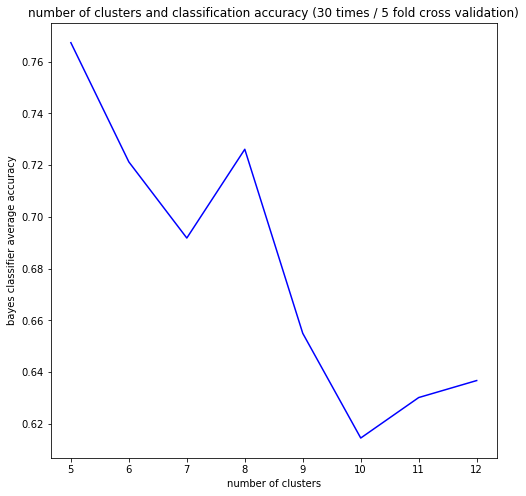

In [387]:
plt.figure(figsize=(8, 8))
plt.plot(cv_score_res.keys(), cv_score_res.values(), 'b')
plt.xlabel("number of clusters")
plt.ylabel("bayes classifier average accuracy")
plt.title("number of clusters and classification accuracy (30 times / 5 fold cross validation)")

In [388]:
print "The best number of cluster is: %d"%8 

The best number of cluster is: 8


In [35]:
yewu_df['label'] = res_label
yewu_df.to_csv("./data/基金和领域匹配(分类后).csv", encoding='utf-8')

In [45]:
yewu_name = yewu_df.columns
yewu_index = [i for i in range(len(yewu_name))]
yewu_index_df = pd.DataFrame({'name': yewu_name, 'index': yewu_index})
yewu_index_df.to_csv("./data/项目领域和序号对应.csv", index=0, encoding="utf-8")

### 结论3： 找到最佳分类算法: SVM (linear)

In [72]:
yewu_df = pd.read_csv("./data/基金和领域匹配(分类后).csv", index_col=0, encoding="utf-8")

In [5]:
cols = yewu_df.columns
X = yewu_df[cols[:-1]]
Y = yewu_df[cols[-1]]

In [235]:
def train_classify_method(X, Y, clf, param, name):
    cv = GridSearchCV(clf, param_grid=[param], cv=5)
    cv.fit(X, Y)
    res = {}
    res['cv'] = cv
    res['best_params'] = cv.best_params_
    res['best_score'] = cv.best_score_
    res['method_name'] = name
    cv_score = []
    return res

In [236]:
def show_classify_method(res):
    best_params = res['best_params']
    print "the method name is: " + res['method_name']
    for k, v in best_params.iteritems():
        print "***** the best param: " + k  + " is: " + str(v) + " *****"
    print "***** the best score: " + str(res['best_score'])

In [237]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [79]:
# naive bayes
bayes_param = {}
bayes = GaussianNB()
bayes_res = train_classify_method(X, Y, bayes, bayes_param, 'Naive Bayes')
show_classify_method(bayes_res)

the method name is: Naive Bayes
***** the best score: 0.943801652893


In [23]:
# svm classifier 
svm_param = {'kernel': ['linear'], 'C': np.arange(0.01, 1, 0.025)}
svm = SVC()
svm_res = train_classify_method(X, Y, svm, svm_param, 'SVM')
show_classify_method(svm_res)

the method name is: SVM
***** the best param: kernel is: linear *****
***** the best param: C is: 0.76 *****
***** the best score: 0.980165289256


In [67]:
import cPickle as pkl

In [58]:
pkl_file = open("./model/svm.dmp", "w")
pkl.dump(svc_model, pkl_file)
pkl_file.close()
pkl.load(open('./model/svm.dmp', 'r'))

### 结论4： 得到距离矩阵: hamming 

In [76]:
cols = yewu_df.columns

In [77]:
X = yewu_df[cols[:-1]]
X_dist = cdist(X, X, metric='hamming')
X_val = X.values
X1 = X_val[0, :].reshape(1, 33)
X2 = X_val[1, :].reshape(1, 33)

In [107]:
cdist(X1, X2, metric='hamming')

array([[ 0.12121212]])

In [113]:
pkl_file = open("./model/distance_yewu.dmp", "w")
pkl.dump(X_dist, pkl_file)
pkl_file.close()
pkl.load(open("./model/distance_yewu.dmp", "r"))

In [247]:
name = yewu_df.index.tolist()
label = [i for i in range(len(name))]

### 统计信息

In [20]:
lingyu = pd.read_csv("./data/基金和领域匹配(分类后).csv")
lingyu = lingyu.drop(['jijin'], axis=1)
res = lingyu.describe()
res  =res.ix['mean']
res.sort_values(ascending=False)

label     3.647934
教育        0.550413
扶贫助困      0.254545
安全救灾      0.152066
医疗救助      0.137190
儿童        0.125620
科学研究      0.117355
文化        0.107438
环境        0.084298
青少年       0.076033
老年人       0.072727
卫生保健      0.067769
公益事业发展    0.054545
创业就业      0.052893
残疾        0.051240
公共服务      0.049587
妇女        0.047934
艺术        0.036364
国际事务      0.029752
社区发展      0.028099
志愿服务      0.026446
三农        0.024793
体育        0.024793
心理健康      0.014876
公共安全      0.014876
侨务        0.008264
法律实施      0.008264
少数民族      0.004959
动物保护      0.003306
公民人权      0.000000
公益行业发展    0.000000
创业        0.000000
就业        0.000000
公益投资      0.000000
Name: mean, dtype: float64

In [36]:
# 地理位置信息
loc = pd.read_csv("./data/所在地信息.csv", header=0)

In [40]:
# 主管单位信息
management = pd.read_csv("./data/主管单位信息.csv", header=0)

In [51]:
# 透明度信息
purity = pd.read_csv("./data/透明度信息.csv", header=0)